# Running instructions

## Change working directory

In [ ]:
cd ~/workspace/genome_data/annotations/s_aureus/gene_sequences/ess_system

## Obtained variants from the multiple sequence alignment files

In [ ]:
snp-sites -v -o variants.vcf aligned.fna

## Extract patristic distances from a phylogeny

In [ ]:
python ~/workspace/pyseer/scripts/phylogeny_distance.py tree.nwk  > phylogeny_dists.tsv

## Performed GWAS

In [ ]:
pyseer --phenotypes /home/vmadmin/workspace/ehr_data/data/full_cohort/tube_id_mortality.pheno --vcf variants.vcf --distances phylogeny_dists.tsv --lineage > mortality_SNPs.txt

### Format output

In [ ]:
cat <(echo "#CHR SNP BP minLOG10(P) log10(p) r^2") <(paste <(sed '1d' mortality_SNPs.txt | cut -d "_" -f 2) <(sed '1d' mortality_SNPs.txt | cut -f 4) | awk '{p = -log($2)/log(10); print "1",".",$1,p,p,"0"}' ) | tr ' ' '\t' > mortality_snps.plot

## Visualise

In [ ]:
import os
import pandas as pd
from pathlib import Path


plotDf = pd.read_csv(
    Path(os.environ['GENOMICS_DATA_BASE'], 'annotations', 's_aureus', 'gene_sequences', 'ess_system', 'mortality_snps.plot'),
    comment='#',
    sep='\t',
    names=["CHR", "SNP", "BP", "minLOG10_p", "log10_p", "r2"]
    )
plotDf

,CHR,SNP,BP,minLOG10_p,log10_p,r2
0,1,.,496,0.031517,0.031517,0
1,1,.,548,0.000000,0.000000,0
2,1,.,559,0.000000,0.000000,0
3,1,.,566,0.106793,0.106793,0
4,1,.,575,0.153045,0.153045,0
...,...,...,...,...,...,...
796,1,.,9590,0.129011,0.129011,0
797,1,.,9591,0.000000,0.000000,0
798,1,.,9594,0.000000,0.000000,0
799,1,.,9597,0.000000,0.000000,0


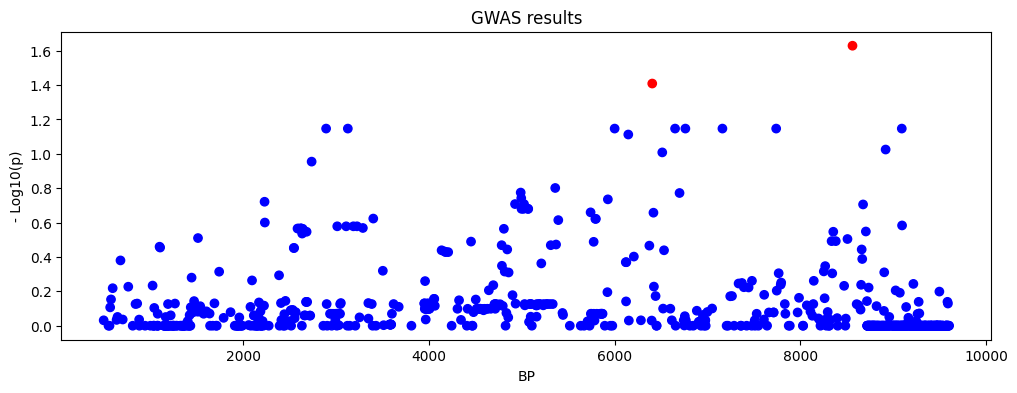

In [ ]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(12, 4))

colors = ['red' if y > 1.301 else 'blue' for y in plotDf.log10_p]

# Create the scatter plot
ax.scatter(plotDf.BP, plotDf.log10_p, c=colors)

# Add labels and title for clarity
ax.set_xlabel("BP")
ax.set_ylabel("- Log10(p)")
ax.set_title("GWAS results")

# Display the plot
plt.show()


## Using `qqman` library in `R`

In [23]:
library(readr)

# Construct the file path using environment variable
genomics_data_base <- Sys.getenv("GENOMICS_DATA_BASE")
file_path <- file.path(genomics_data_base, "annotations", "s_aureus", "gene_sequences", "ess_system", "mortality_snps.plot")

# Read the file, skipping comment lines
plot.df <- read_tsv(
  file_path,
  comment = "#",
  col_names = c("CHR", "SNP", "BP", "minLOG10_p", "log10_p", "r2")
)

plot.df$SNP <- paste(plot.df$CHR, plot.df$BP, sep = "_")

head(plot.df)

Rows: 801 Columns: 6


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): SNP
dbl (5): CHR, BP, minLOG10_p, log10_p, r2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CHR,SNP,BP,minLOG10_p,log10_p,r2
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1_496,496,0.0315171,0.0315171,0
1,1_548,548,0.0000000,0.0000000,0
1,1_559,559,0.0000000,0.0000000,0
1,1_566,566,0.1067930,0.1067930,0
1,1_575,575,0.1530450,0.1530450,0
1,1_593,593,0.2182450,0.2182450,0


ERROR: Error in manhattan(plot.df, chr = "CHR", bp = "BP", snp = "SNP", p = "log10_p", : non-numeric argument to binary operator


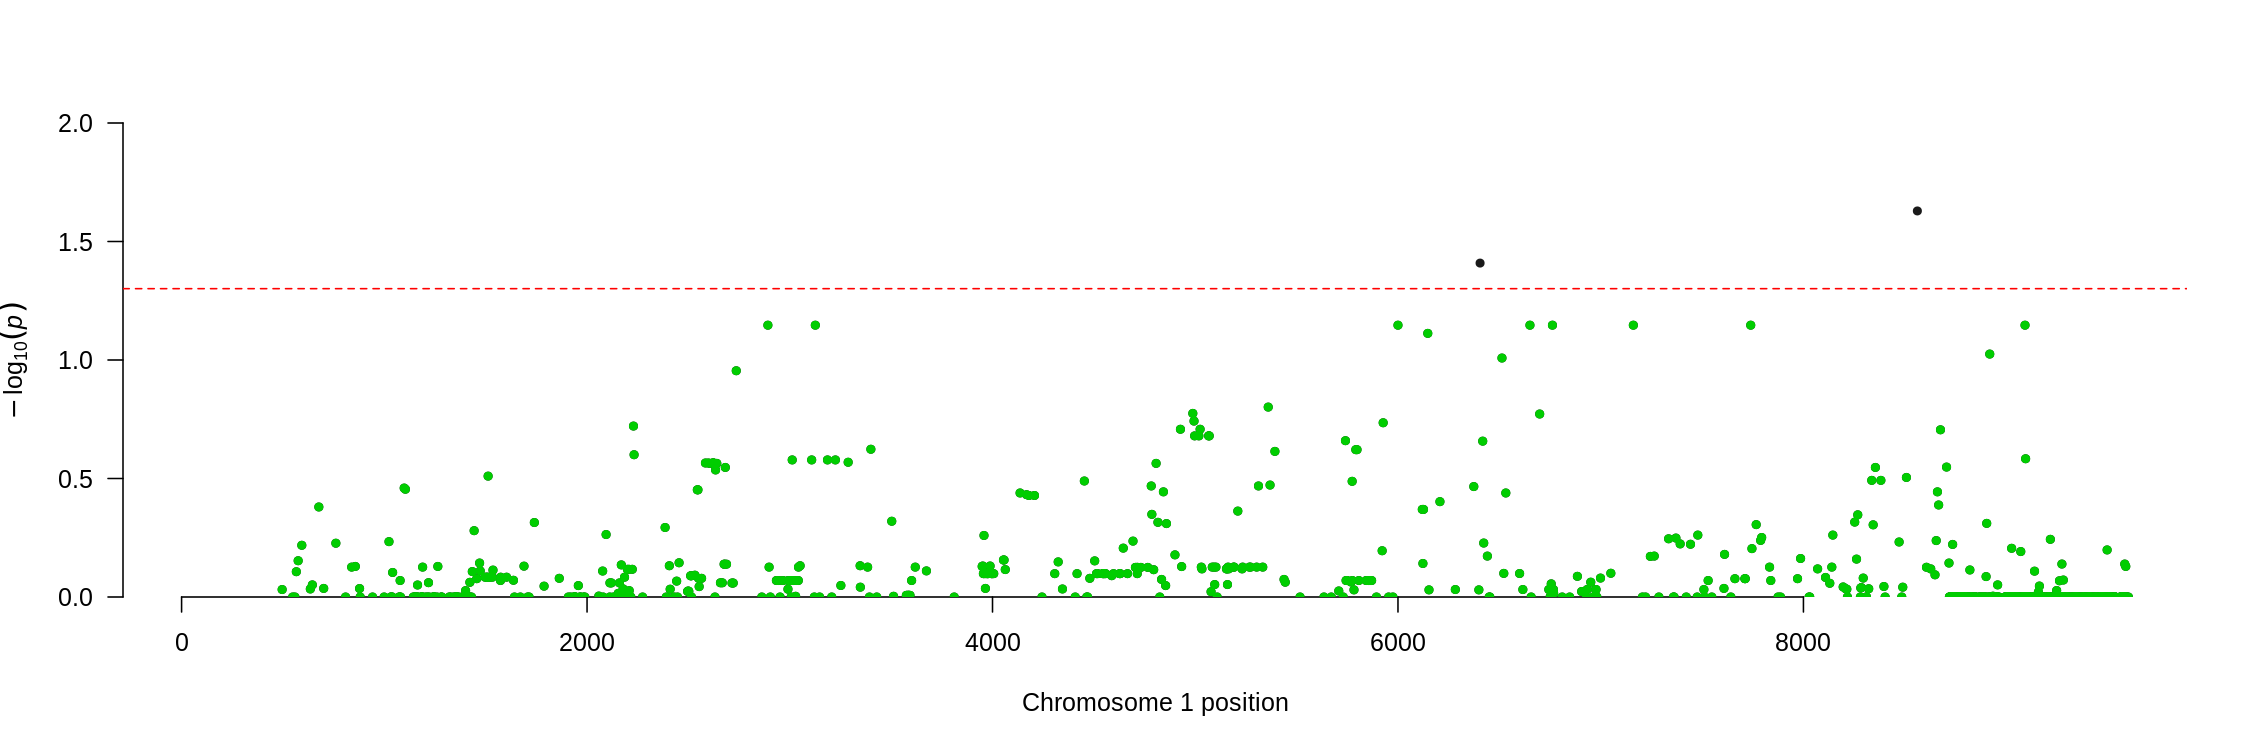

In [31]:
library(qqman)


signif.snps <- plot.df$SNP[plot.df$log10_p < 1.301]

options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 150)
par(bg = "white")
manhattan(
    plot.df,
    chr="CHR",
    bp="BP",
    snp="SNP",
    p="log10_p",
    logp=FALSE,
    highlight = signif.snps
    ) +
    abline(h = 1.301, col = "red", lty = 2)

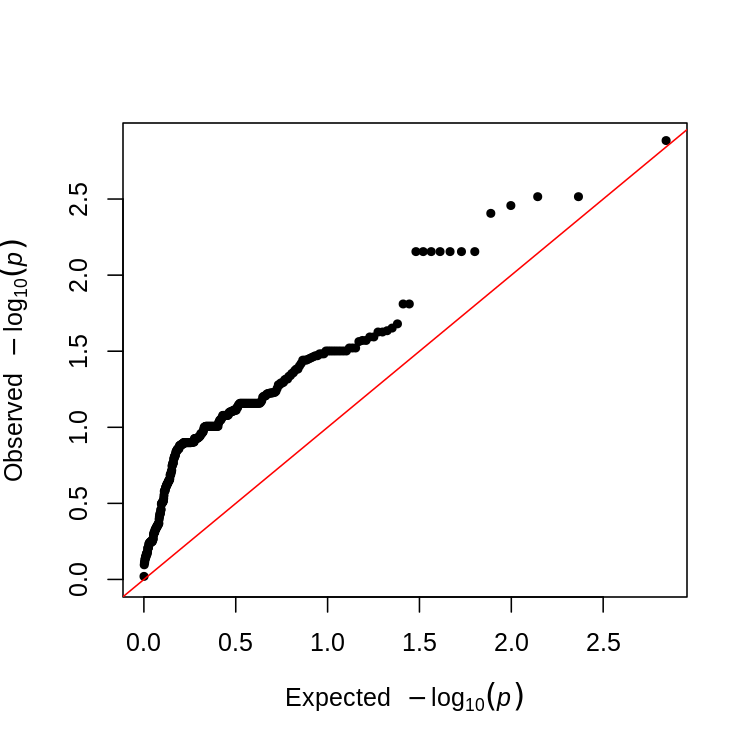

In [30]:
library(qqman)


options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
par(bg = "white")
qq(plot.df$log10_p)